In [81]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Load dataset
file_path = (r"C:\Users\chiso\Documents\Africa_Agility\Hackathon\PriceModel\world_bank_data.csv")
df = pd.read_csv(file_path)
df.head(10)

,Country,Region,Market,Product,Date,Open,High,Low,Close,Currency
0,Nigeria,Market Average,Market Average,bread,01/01/2007,27.89,29.11,26.65,27.89,NGN
1,Nigeria,Market Average,Market Average,bread,01/02/2007,27.88,29.11,26.65,26.75,NGN
2,Nigeria,Market Average,Market Average,bread,01/03/2007,26.35,27.51,25.18,27.31,NGN
3,Nigeria,Market Average,Market Average,bread,01/04/2007,27.46,28.63,26.28,26.84,NGN
4,Nigeria,Market Average,Market Average,bread,01/05/2007,26.65,27.78,25.51,26.95,NGN
5,Nigeria,Market Average,Market Average,bread,01/06/2007,27.02,28.14,25.90,27.01,NGN
6,Nigeria,Market Average,Market Average,bread,01/07/2007,26.97,28.07,25.87,26.67,NGN
7,Nigeria,Market Average,Market Average,bread,01/08/2007,26.61,27.67,25.54,27.48,NGN
8,Nigeria,Market Average,Market Average,bread,01/09/2007,27.72,28.81,26.63,28.47,NGN
9,Nigeria,Market Average,Market Average,bread,01/10/2007,28.91,30.27,27.80,30.27,NGN


In [83]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   2190 non-null   object 
 1   Region    2190 non-null   object 
 2   Market    2190 non-null   object 
 3   Product   2190 non-null   object 
 4   Date      2190 non-null   object 
 5   Open      2190 non-null   float64
 6   High      2190 non-null   float64
 7   Low       2190 non-null   float64
 8   Close     2190 non-null   float64
 9   Currency  2190 non-null   object 
dtypes: float64(4), object(6)
memory usage: 171.2+ KB


In [84]:
df.columns

Index(['Country', 'Region', 'Market', 'Product', 'Date', 'Open', 'High', 'Low',
       'Close', 'Currency'],
      dtype='object')

In [85]:
df.nunique()

Country        1
Region         1
Market         1
Product       10
Date         219
Open        2173
High        2184
Low         2179
Close       2117
Currency       1
dtype: int64

In [86]:
df.shape

(2190, 10)

In [87]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country     0
Region      0
Market      0
Product     0
Date        0
Open        0
High        0
Low         0
Close       0
Currency    0
dtype: int64


In [88]:
# Checking for duplicate values
print("\nDuplicate Values:")
print(df.duplicated().sum())


Duplicate Values:
0


In [89]:
# Check unique values in the Product column
print(df['Product'].unique())

['bread' 'cassava_meal' 'cowpeas' 'gari' 'groundnuts' 'maize' 'millet'
 'rice' 'sorghum' 'yam']


In [90]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Country,Region,Market,Product,Date,Open,High,Low,Close,Currency
0,Nigeria,Market Average,Market Average,bread,2007-01-01,27.89,29.11,26.65,27.89,NGN
1,Nigeria,Market Average,Market Average,bread,2007-01-02,27.88,29.11,26.65,26.75,NGN
2,Nigeria,Market Average,Market Average,bread,2007-01-03,26.35,27.51,25.18,27.31,NGN
3,Nigeria,Market Average,Market Average,bread,2007-01-04,27.46,28.63,26.28,26.84,NGN
4,Nigeria,Market Average,Market Average,bread,2007-01-05,26.65,27.78,25.51,26.95,NGN
...,...,...,...,...,...,...,...,...,...,...
2185,Nigeria,Market Average,Market Average,yam,2024-01-11,557.84,559.98,554.81,554.81,NGN
2186,Nigeria,Market Average,Market Average,yam,2024-01-12,561.29,580.89,541.64,541.64,NGN
2187,Nigeria,Market Average,Market Average,yam,2025-01-01,544.01,561.97,526.05,541.30,NGN
2188,Nigeria,Market Average,Market Average,yam,2025-01-02,548.31,555.43,540.56,540.56,NGN


In [91]:
#Spilting the date column into day, month, year and dayofweek
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [92]:
# Create a new column for the average price of the product
df['Avg_price'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)
df

,Country,Region,Market,Product,Date,Open,High,Low,Close,Currency,Year,Month,Day,Avg_price
0,Nigeria,Market Average,Market Average,bread,2007-01-01,27.89,29.11,26.65,27.89,NGN,2007,1,1,27.8850
1,Nigeria,Market Average,Market Average,bread,2007-01-02,27.88,29.11,26.65,26.75,NGN,2007,1,2,27.5975
2,Nigeria,Market Average,Market Average,bread,2007-01-03,26.35,27.51,25.18,27.31,NGN,2007,1,3,26.5875
3,Nigeria,Market Average,Market Average,bread,2007-01-04,27.46,28.63,26.28,26.84,NGN,2007,1,4,27.3025
4,Nigeria,Market Average,Market Average,bread,2007-01-05,26.65,27.78,25.51,26.95,NGN,2007,1,5,26.7225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Nigeria,Market Average,Market Average,yam,2024-01-11,557.84,559.98,554.81,554.81,NGN,2024,1,11,556.8600
2186,Nigeria,Market Average,Market Average,yam,2024-01-12,561.29,580.89,541.64,541.64,NGN,2024,1,12,556.3650
2187,Nigeria,Market Average,Market Average,yam,2025-01-01,544.01,561.97,526.05,541.30,NGN,2025,1,1,543.3325
2188,Nigeria,Market Average,Market Average,yam,2025-01-02,548.31,555.43,540.56,540.56,NGN,2025,1,2,546.2150


In [93]:
# Step 1: Remove non-numeric characters (commas, currency symbols, etc.)
df['Avg_price'] = df['Avg_price'].replace('[^0-9\.]', '', regex=True)

# Step 2: Convert to float
df['Avg_price'] = pd.to_numeric(df['Avg_price'], errors='coerce')  # invalid values become NaN

# Step 3: Check the result
print(df[['Avg_price']].dtypes)

Avg_price    float64
dtype: object


In [94]:
#Drop some col
df= df.drop(columns=['Country', 'Region', 'Market', 'Open', 'High', 'Low', 'Close', 'Currency'])

#To drop the first row
df = df.iloc[1:].reset_index(drop=True)

## EXPLORATORY DATA ANALYSIS

In [95]:
#Statistics description for the price column
df['Avg_price'].describe()

count     2189.000000
mean     17581.607630
std      17736.551761
min         21.322500
25%       5901.502500
50%      11953.585000
75%      25196.400000
max      84463.942500
Name: Avg_price, dtype: float64

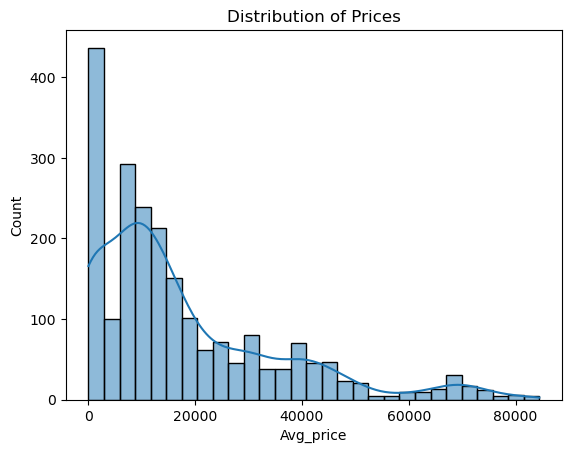

In [96]:
#Distribution of Price
sns.histplot(df['Avg_price'], kde=True)
plt.title('Distribution of Prices')
plt.show()

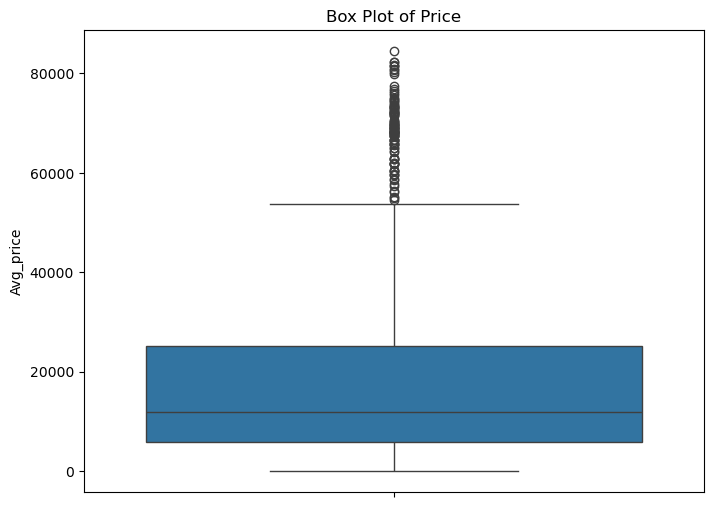

In [97]:
#check for outliers in price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Avg_price'])
plt.title('Box Plot of Price')
plt.show()

In [98]:
# Group by Product and Date to observe price trends over time
price_trends = df.groupby(["Product", "Date"])["Avg_price"].mean().reset_index()

# Display first few rows of price trends
print(price_trends.head())

  Product       Date  Avg_price
0   bread 2007-01-02    27.5975
1   bread 2007-01-03    26.5875
2   bread 2007-01-04    27.3025
3   bread 2007-01-05    26.7225
4   bread 2007-01-06    27.0175


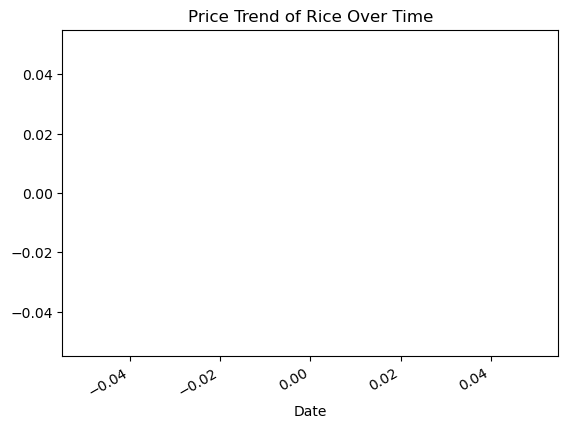

In [99]:
#Trend of a specific commodity (e.g. Rice):
df[df['Product'] == 'Rice'].groupby('Date')['Avg_price'].mean().plot()
plt.title('Price Trend of Rice Over Time')
plt.show()

## FEATURE ENGINEERING AND MODEL BUILDING

In [100]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Product'], dtype='object')


In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Dictionary to store encoders

# Loop through each categorical column and apply encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder

In [102]:
for col, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col} mapping: {mapping}")

Product mapping: {'bread': 0, 'cassava_meal': 1, 'cowpeas': 2, 'gari': 3, 'groundnuts': 4, 'maize': 5, 'millet': 6, 'rice': 7, 'sorghum': 8, 'yam': 9}


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
# Define features and target variable
X = df.drop(columns=["Date", "Avg_price"])
y = df["Avg_price"]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
print(X_train.shape)

print(X_test.shape)

(1751, 4)
(438, 4)


In [107]:
import joblib

In [108]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train and evaluate regression models
results = {}
best_model = None
best_model_name = None
best_r2 = float('-inf')  # Best model based on R2 score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics for regression
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save the best model based on highest R2 score
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)
results_df

,MAE,MSE,R2 Score
XGBoost,862.420582,2.428715e+06,0.992744
Random Forest,954.043837,4.691417e+06,0.985984
Gradient Boosting,2631.271249,1.754761e+07,0.947574
Linear Regression,11243.567077,2.374377e+08,0.290614


In [109]:
y_pred[:10]

array([14992.741  , 17481.832  ,   280.8464 , 22953.695  ,  8270.698  ,
       28457.014  ,   220.24625, 58345.133  , 73193.26   ,  4596.095  ],
      dtype=float32)

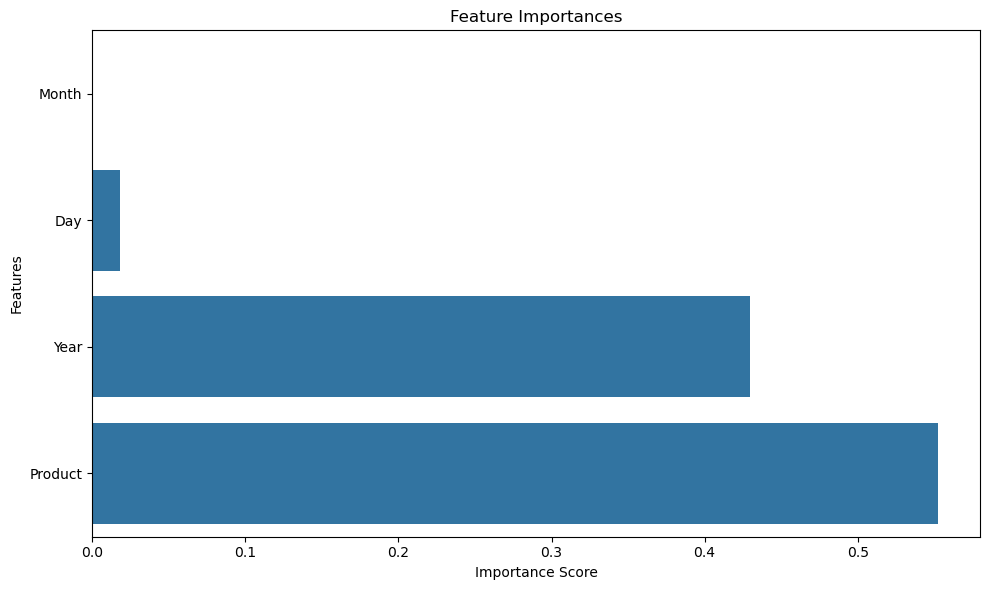

In [110]:
# Get feature importances
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

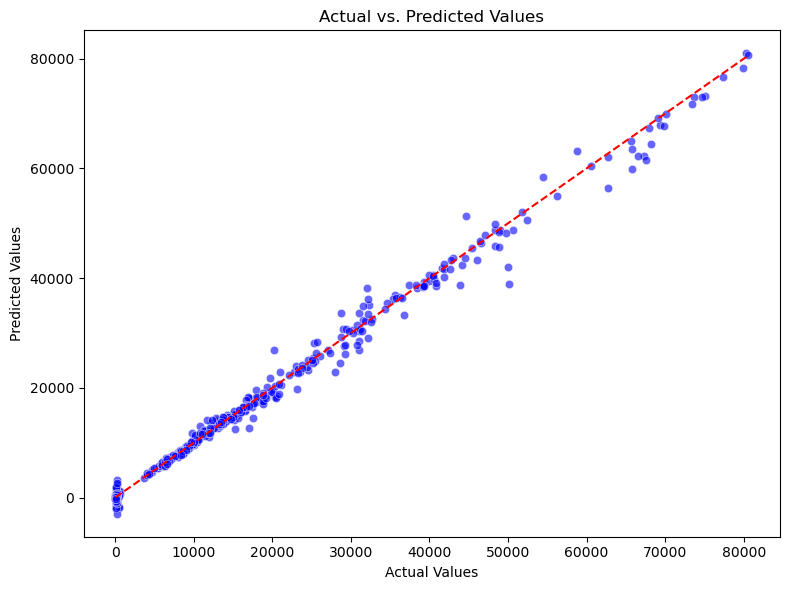

In [111]:
# Predict on test data
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.tight_layout()
plt.show()

In [112]:
# Save the best model
joblib.dump(best_model, "food_price_model.pkl")
print(f"Best Model: {best_model_name} (R² Score: {best_r2:.2%})")

Best Model: XGBoost (R² Score: 99.27%)


In [113]:
df.head(3)

,Product,Date,Year,Month,Day,Avg_price
0,0,2007-01-02,2007,1,2,27.5975
1,0,2007-01-03,2007,1,3,26.5875
2,0,2007-01-04,2007,1,4,27.3025


In [114]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_1 = np.array([[0,  # Product - Bread
                          2007,  # Year
                          1,    # Month
                          2]])   # Day
                          

# Make a prediction
y_pred_scaled_1 = best_model.predict(single_input_1)
print(y_pred_scaled_1)

[167.61716]


In [115]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_2 = np.array([[0,  # Product - Bread
                          2025,  # Year
                          5,    # Month
                          10]])   # Day
                          

# Make a prediction
y_pred_scaled_2 = best_model.predict(single_input_2)
print(y_pred_scaled_2)

[-2688.6846]


In [116]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_3 = np.array([[4,  # Product - Groundnut
                          2024,  # Year
                          4,    # Month
                          12]])   # Day
                          

# Make a prediction
y_pred_scaled_3 = best_model.predict(single_input_3)
print(y_pred_scaled_3)

[80975.05]


In [117]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_7 = np.array([[4,  # Product - Groundnut
                          2025,  # Year
                          4,    # Month
                          12]])   # Day
                          

# Make a prediction
y_pred_scaled_7 = best_model.predict(single_input_7)
print(y_pred_scaled_7)

[85479.89]


In [118]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_4 = np.array([[7,  # Product - Rice
                          2024,  # Year
                          4,    # Month
                          12]])   # Day
                          

# Make a prediction
y_pred_scaled_4 = best_model.predict(single_input_4)
print(y_pred_scaled_4)

[74301.8]


In [119]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_5 = np.array([[7,  # Product - Rice
                          2025,  # Year
                          3,    # Month
                          27]])   # Day
                          

# Make a prediction
y_pred_scaled_5 = best_model.predict(single_input_5)
print(y_pred_scaled_5)

[77039.35]


In [120]:
# Load the saved model
best_model = joblib.load("food_price_model.pkl")

# Define a single input with TotalIncome included
single_input_6 = np.array([[9,  # Product - Yam
                          2025,  # Year
                          4,    # Month
                          27]])   # Day
                          

# Make a prediction
y_pred_scaled_6 = best_model.predict(single_input_6)
print(y_pred_scaled_6)

[1380.3771]
